import essential libraries and data

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('globalenglish_essay_scoring.csv', encoding='latin1')

Visualize data

In [22]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0


Lets see highest and lowest scoring essays: 

In [23]:
df['essay'][df['domain1_score'].idxmax()]

' Bell rings.  Shuffle, shuffle. @CAPS1. Snap. EEEE. Crack. Slam. Click, stomp, @CAPS1. Tap tap tap. SLAM. Creak. Shoof, shoof.  Sigh. Seventh class of the day. Here we go. "@CAPS2! Tu va ou pas? On a +\xc3\x82tude cette class-l+\xc2\x87. Tu peux aller au bibliotheque si tu veux...." @CAPS3 all blinked at me, @PERSON1, @NUM1le and @ORGANIZATION1, chocolate-haired and mocha skinned, impatiently awaiting my answer. The truth was, I knew @CAPS3 didn\'t really care if I came or not. It made no difference to them if I trailed a few feet behind like some pathetic puppy. I was silent but adorable, loved only because I was an @CAPS4. Because I spoke fidgety @CAPS5. Because I was the exchange student, because my translator and colorful clothes were so shocking for ten seconds, and were then forgotten about.  I was a flock of seagulls haircut. So why are you here? I thought. Why did you go on exchange at all? You are the complete opposite of everyone here. No one wants you. Just go home.  But my

In [25]:
df['essay'][df['domain1_score'].idxmin()]

'The affects of the cyclist is if it does not change. it cut hurt a lot of people feeling because they @CAPS1 don\xc3\x95t care about the cyclist. I\xc3\x95m one of them people who does not care about it cause it does not affect me or anyone I know. It is a big deal to write people, some of them @CAPS1 blow stuff up. They talking on tiv and on the radio making all this stuff they say is made up. I don\xc3\x95t believe to I see it. That @CAPS1 not for black people because it has not did anything to us. We really don\xc3\x95t care about the affects of the cyclist.'

Now lets see some other statistics to better visualize data

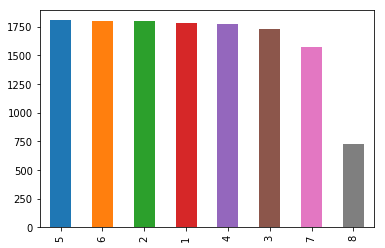

In [36]:
df['essay_set'].value_counts().plot(kind='bar')

In [57]:
df[['essay_set','rater1_domain1']].groupby(['essay_set']).agg(['mean', 'count','std'])

rater1_domain1                
                    mean count       std
essay_set                               
1               4.260796  1783  0.842119
2               3.415556  1800  0.774512
3               1.741020  1726  0.777672
4               1.319593  1771  0.880135
5               2.221053  1805  0.988515
6               2.561111  1800  0.979296
7               8.023582  1569  2.424120
8              18.338866   723  3.170147

In [58]:
df[['essay_set','rater2_domain1']].groupby(['essay_set']).agg(['mean', 'count','std'])

rater2_domain1                
                    mean count       std
essay_set                               
1               4.267527  1783  0.816287
2               3.436667  1800  0.775808
3               1.698725  1726  0.752710
4               1.315641  1771  0.877386
5               2.221607  1805  0.992030
6               2.550000  1800  0.977655
7               8.038878  1569  2.517367
8              18.557400   723  3.170669

In [59]:
df[['essay_set','domain1_score']].groupby(['essay_set']).agg(['mean', 'count','std'])

domain1_score                
                   mean count       std
essay_set                              
1              8.528323  1783  1.538565
2              3.415556  1800  0.774512
3              1.848204  1726  0.815157
4              1.431395  1771  0.940133
5              2.408864  1805  0.970821
6              2.720000  1800  0.970630
7             16.062460  1569  4.585350
8             36.950207   723  5.753502

In [69]:
df.isnull().any()

essay_id          False
essay_set         False
essay             False
rater1_domain1    False
rater2_domain1    False
domain1_score     False
dtype: bool

There are some essays without ratings. We will need to deal with these null values. 

In [68]:
df[df.isnull().any(axis=1)]

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score


Lets assign the record, average values from the set

In [67]:
df['rater1_domain1'][6973]  = 1.319593
df['rater2_domain1'][6973]  = 1.315641
df['domain1_score'][6973] = 1.431395

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
def count_words(essay):
    essay_arr = essay.split()
    return len(essay_arr)
print count_words(df['essay'][25])

360


In [78]:
df['word_count'] = df['essay'].apply(count_words,)

In [80]:
df[['essay_set','word_count']].groupby(['essay_set']).agg(['mean', 'count','std'])

word_count                  
                 mean count         std
essay_set                              
1          365.680875  1783  119.610313
2          380.748333  1800  156.177101
3          108.642526  1726   53.265626
4           94.371896  1772   51.667354
5          122.130194  1805   57.314718
6          153.298333  1800   55.767278
7          168.184194  1569   85.276560
8          604.874136   723  202.004016

We can see overall ratings co-relate to the length of an essay. Which is understandable. Lets try few other matrics 

In [ ]:
def avg_word_length(essay):
    essay_arr = essay.split()
    length = 
    for word in essay_arr:
        